In [1]:
import os
print(os.getcwd())
os.chdir('C:/Users/puran/Desktop/DS material/EDA/Housing Price Analysis')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from collections import Counter

train = pd.read_csv("Train.csv")

C:\Users\puran\Desktop\DS material\EDA


Target variable (continous) - medv
Indepedent variable (continous) - crim, zn, indus, nox, rm, age, dis, ptratio, black, lstat
Indepedent variable (categorical) - chas, rad, tax

# Univariate Analysis

##### Dependent Variable (Categorical)

In [2]:
train.medv.describe()

count    333.000000
mean      22.768769
std        9.173468
min        5.000000
25%       17.400000
50%       21.600000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

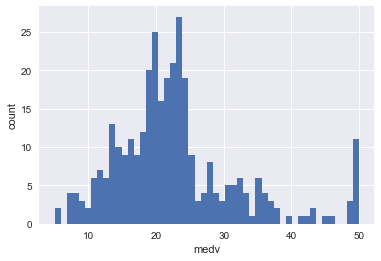

In [3]:
plt.hist(train.medv,bins=50)
plt.xlabel("medv")
plt.ylabel("count")
plt.show()

There is no clear-cut picture in medv.
##### Independent Variable (Categorical)

In [4]:
train[["chas","rad","tax"]].describe()

,chas,rad,tax
count,333.000000,333.000000,333.000000
mean,0.060060,9.633634,409.279279
std,0.237956,8.742174,170.841988
min,0.000000,1.000000,188.000000
25%,0.000000,4.000000,279.000000
50%,0.000000,5.000000,330.000000
75%,0.000000,24.000000,666.000000
max,1.000000,24.000000,711.000000


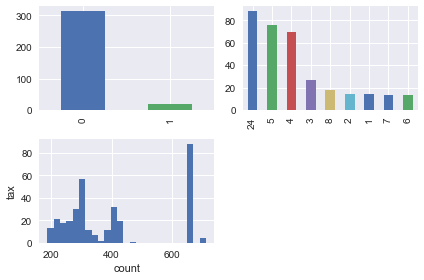

In [8]:
plt.subplot(221)
train["chas"].value_counts().plot(kind='bar')
plt.subplot(222)
train["rad"].value_counts().plot(kind='bar')
plt.subplot(223)
#train["tax"].value_counts().plot(kind='bar')
plt.hist(train.tax,bins=25)
plt.ylabel("tax")
plt.xlabel("count")
plt.tight_layout()       
plt.show()

Observations:
1) Majority of houses were far from Charles River.
2) More number of houses are present near to radial highway.
3) There is no clear picture in tax. 

##### Independent Variable (Continous)

In [9]:
train[["crim", "zn", "indus", "nox", "rm", "age", "dis", "ptratio", "black", "lstat"]].describe()

,crim,zn,indus,nox,rm,age,dis,ptratio,black,lstat
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.557144,6.265619,68.226426,3.709934,18.448048,359.466096,12.515435
std,7.352272,22.674762,6.998123,0.114955,0.703952,28.133344,1.981123,2.151821,86.584567,7.067781
min,0.006320,0.000000,0.740000,0.385000,3.561000,6.000000,1.129600,12.600000,3.500000,1.730000
25%,0.078960,0.000000,5.130000,0.453000,5.884000,45.400000,2.122400,17.400000,376.730000,7.180000
50%,0.261690,0.000000,9.900000,0.538000,6.202000,76.700000,3.092300,19.000000,392.050000,10.970000
75%,3.678220,12.500000,18.100000,0.631000,6.595000,93.800000,5.116700,20.200000,396.240000,16.420000
max,73.534100,100.000000,27.740000,0.871000,8.725000,100.000000,10.710300,21.200000,396.900000,37.970000


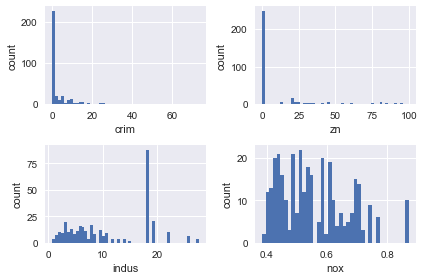

In [38]:
plt.subplot(221)
plt.hist(train.crim,bins=50) #rwidth sets width of bars.If it's 1 then the bars will touch each other
plt.xlabel("crim")
plt.ylabel("count")
plt.subplot(222)
plt.hist(train.zn,bins=50) #rwidth sets width of bars.If it's 1 then the bars will touch each other
plt.xlabel("zn")
plt.ylabel("count")
plt.subplot(223)
plt.hist(train.indus,bins=50)
plt.xlabel("indus")
plt.ylabel("count")
plt.subplot(224)
plt.hist(train.nox,bins=40) #rwidth sets width of bars.If it's 1 then the bars will touch each other
plt.xlabel("nox")
plt.ylabel("count")
plt.tight_layout()          # this function makes sure the plots dont overlap.Comment this and execute to observe the difference
plt.show()

Observations:
1) CRIM and ZN are right skewed and should apply log transformation to reduce the skewness. 
2) No clear pattern in INDUS and NOX. 

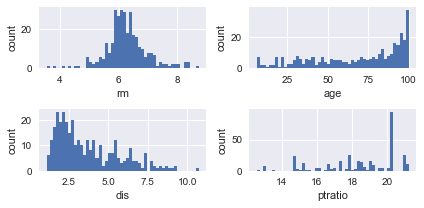

In [49]:
plt.subplot(321)
plt.hist(train.rm,bins=50) #rwidth sets width of bars.If it's 1 then the bars will touch each other
plt.xlabel("rm")
plt.ylabel("count")
plt.subplot(322)
plt.hist(train.age,bins=50)
plt.xlabel("age")
plt.ylabel("count")
plt.subplot(323)
plt.hist(train.dis,bins=50) #rwidth sets width of bars.If it's 1 then the bars will touch each other
plt.xlabel("dis")
plt.ylabel("count")
plt.subplot(324)
plt.hist(train.ptratio,bins=50) #rwidth sets width of bars.If it's 1 then the bars will touch each other
plt.xlabel("ptratio")
plt.ylabel("count")
plt.tight_layout()          # this function makes sure the plots dont overlap.Comment this and execute to observe the difference
plt.show()

1) Majority of houses are having rooms between 5 to 7.
2) AGE was left skewed and should apply log transformation. 
3) No clear pattern in dis and ptratio.

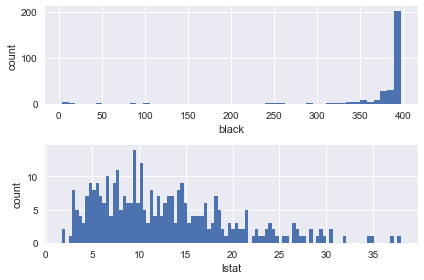

In [54]:
plt.subplot(211)
plt.hist(train.black,bins=50)
plt.xlabel("black")
plt.ylabel("count")
plt.subplot(212)
plt.hist(train.lstat,bins=100)
plt.xlabel("lstat")
plt.ylabel("count")
plt.tight_layout()        
plt.show()

1) Black was left skewed. Can apply log transformation.
2) No pattern in LSTAT. 

# Bivariate Analysis 

### Target Variable vs Independent Categorical Variables###

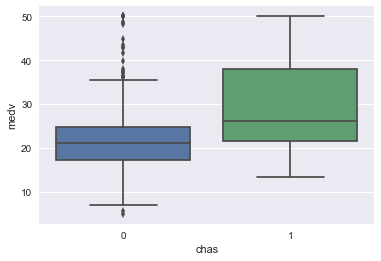

In [14]:
sns.boxplot(y=train.medv,x=train.chas)
plt.show()

Most of the houses are away from Charles river. 

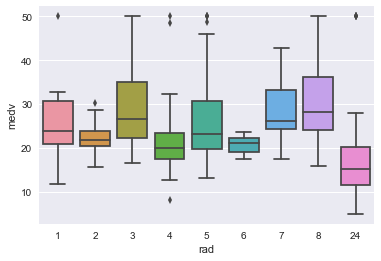

In [13]:
sns.boxplot(y=train.medv,x=train.rad)
plt.show()

 We can apply log transformation to remove the outliers.

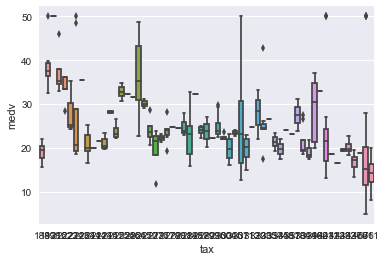

In [4]:
sns.boxplot(y=train.medv,x=train.tax)
plt.show()

No clear pattern in tax.

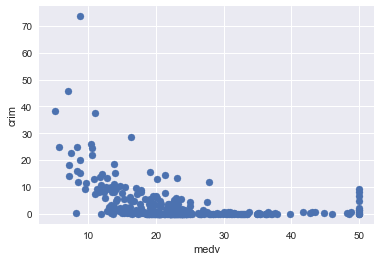

In [21]:
plt.scatter(y=train.crim,x=train.medv)
plt.ylabel("crim")
plt.xlabel("medv")
plt.show()

In order to handle the outliers, we can delete the records whose CRIM is more than 30. Since we have only 4 such records (less than 5% of dataset).  

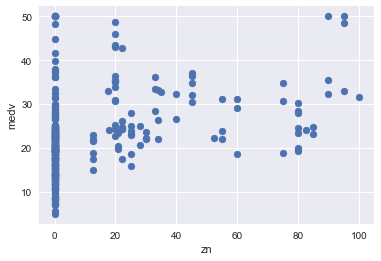

In [15]:
plt.scatter(x=train.zn,y=train.medv)
plt.xlabel("zn")
plt.ylabel("medv")
plt.show()

Most of the houses were not at residential land zoned. Can apply log transformation. 

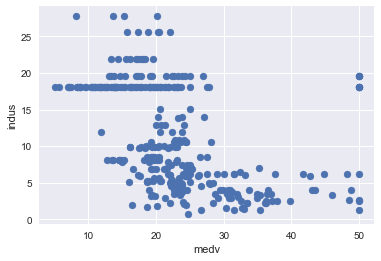

In [3]:
plt.scatter(y=train.indus,x=train.medv)
plt.ylabel("indus")
plt.xlabel("medv")
plt.show()

Most of the houses are near to non-retail business acres. Can use mean imputation to handle the outliers. 

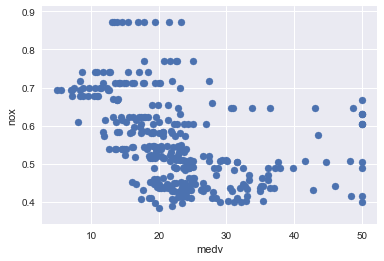

In [26]:
plt.scatter(y=train.nox,x=train.medv)
plt.ylabel("nox")
plt.xlabel("medv")
plt.show()

All the houses are having nitric oxide concentrations. Need to normalize the data.

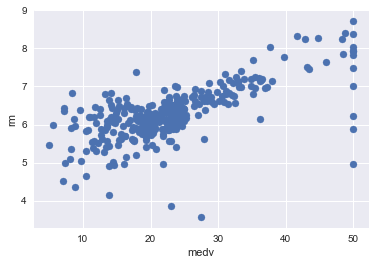

In [7]:
plt.scatter(y=train.rm,x=train.medv)
plt.ylabel("rm")
plt.xlabel("medv")
plt.show()

As number of rooms increasing, MEDV is also increasing. Can use mean imputation to handle the outliers. 

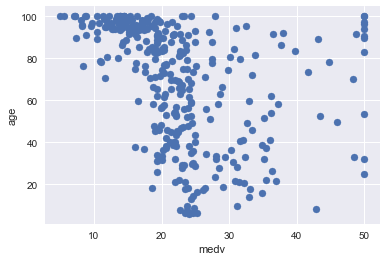

In [4]:
plt.scatter(y=train.age,x=train.medv)
plt.ylabel("age")
plt.xlabel("medv")
plt.show()

As the age increases, MEDV is decreasing. Can apply log transformation.

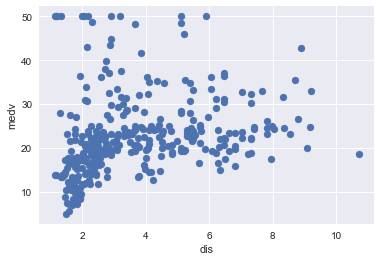

In [5]:
plt.scatter(x=train.dis,y=train.medv)
plt.xlabel("dis")
plt.ylabel("medv")
plt.show()

As DIS increasing, MEDV is decreasing. Can apply root transformation.

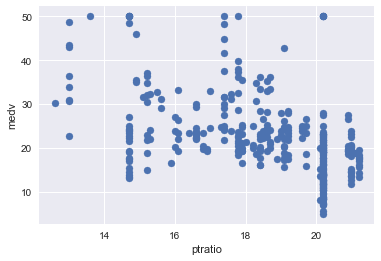

In [33]:
plt.scatter(x=train.ptratio,y=train.medv)
plt.xlabel("ptratio")
plt.ylabel("medv")
plt.show()

More number of houses were found between the PTRATIO 15 to 20. Need to normalize the data.

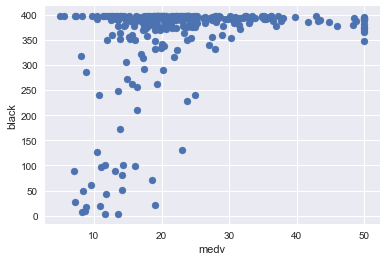

In [35]:
plt.scatter(y=train.black,x=train.medv)
plt.ylabel("black")
plt.xlabel("medv")
plt.show()

As the majority of blacks increases, houses were also increasing. Can apply log transformation.

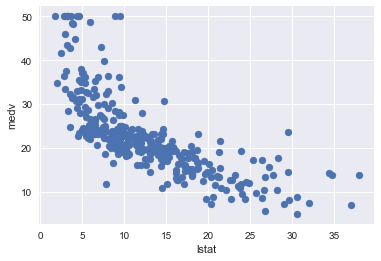

In [36]:
plt.scatter(x=train.lstat,y=train.medv)
plt.xlabel("lstat")
plt.ylabel("medv")
plt.show()

As LSTAT increases, MEDV is decreasing. Can apply mean imputation to handle the outliers. 